In [1]:
from AGFCW.model.linear_model import LogisticRegression
from AGFCW.data_processor.data_loader import MSDDataset
from AGFCW.optimizer.batch_selector import BatchSelector
from AGFCW.optimizer.AGFCW_minimizer import AGFCW
from AGFCW.optimizer.AGFFull_minimizer import AGFFull
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['font.size'] = 14

In [3]:
dataset = MSDDataset()
dataset.load()

In [4]:
torch.manual_seed(10)
np.random.seed(10)
model = LogisticRegression(dataset.dim)
batch_selector = BatchSelector(n_params=model.n_params, idxs=dataset.train_idxs)
accel_minimizer = AGFCW(model=model, dataset=dataset, batch_selector=batch_selector, n_epoch=3, L_0=1, tau=1e-4, accelerated=True, coord_L=False)
accel_minimizer.run()

178 iters, 3 epoches complete, train loss: 0.609, test loss: 0.615

In [5]:
torch.manual_seed(10)
np.random.seed(10)
model = LogisticRegression(dataset.dim)
batch_selector = BatchSelector(n_params=model.n_params, idxs=dataset.train_idxs)
non_accel_minimizer = AGFCW(model=model, dataset=dataset, batch_selector=batch_selector, n_epoch=9, L_0=1, tau=1e-2, accelerated=False)
non_accel_minimizer.run()

120 iters, 10 epoches complete, train loss: 0.61, test loss: 0.616

In [6]:
torch.manual_seed(10)
np.random.seed(10)
model = LogisticRegression(dataset.dim)
batch_selector = BatchSelector(n_params=model.n_params, idxs=dataset.train_idxs, coord_wise=False)
full_minimizer = AGFFull(model=model, dataset=dataset, batch_selector=batch_selector, n_epoch=1, L_0=1)
full_minimizer.run()

300 iters, 0 epoches complete, train loss: 0.615, test loss: 0.623

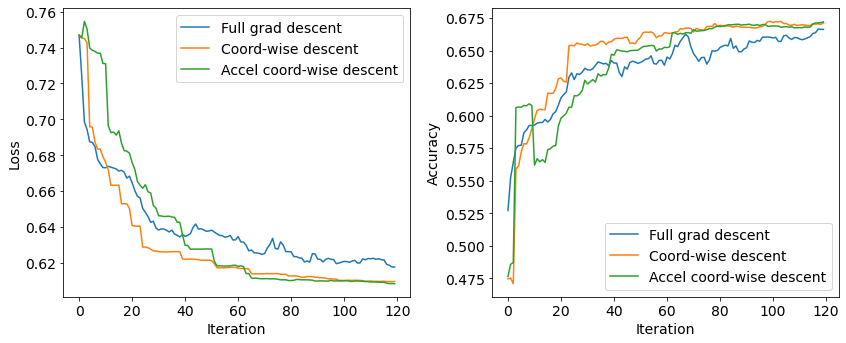

In [9]:
iters_qty=120

plt.subplot(1, 2, 1)
plt.plot(full_minimizer.train_losses[:iters_qty], label='Full grad descent')
plt.plot(non_accel_minimizer.train_losses[:iters_qty], label='Coord-wise descent')
plt.plot(accel_minimizer.train_losses[:iters_qty], label='Accel coord-wise descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(full_minimizer.test_acc[:iters_qty], label='Full grad descent')
plt.plot(non_accel_minimizer.test_acc[:iters_qty], label='Coord-wise descent')
plt.plot(accel_minimizer.test_acc[:iters_qty], label='Accel coord-wise descent')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('./pics/iteration_progress.png')
plt.show()

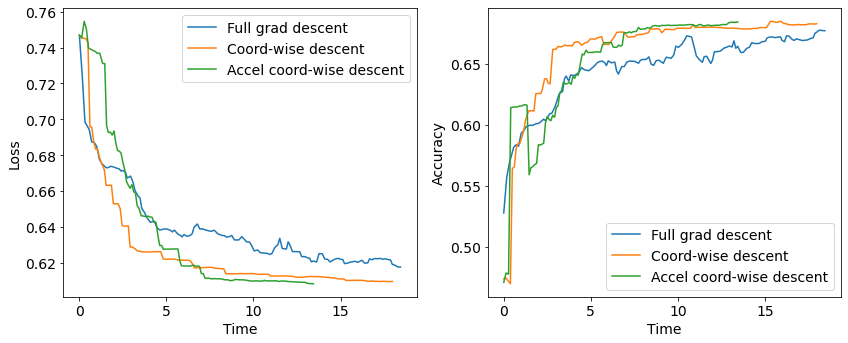

In [10]:
iters_qty=120

plt.subplot(1, 2, 1)
plt.plot(full_minimizer.time_hist[:iters_qty], full_minimizer.train_losses[:iters_qty], label='Full grad descent')
plt.plot(non_accel_minimizer.time_hist[:iters_qty], non_accel_minimizer.train_losses[:iters_qty], label='Coord-wise descent')
plt.plot(accel_minimizer.time_hist[:iters_qty], accel_minimizer.train_losses[:iters_qty], label='Accel coord-wise descent')
plt.xlabel('Time')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(full_minimizer.time_hist[:iters_qty], full_minimizer.train_acc[:iters_qty], label='Full grad descent')
plt.plot(non_accel_minimizer.time_hist[:iters_qty], non_accel_minimizer.train_acc[:iters_qty], label='Coord-wise descent')
plt.plot(accel_minimizer.time_hist[:iters_qty], accel_minimizer.train_acc[:iters_qty], label='Accel coord-wise descent')
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('./pics/time_progress.png')
plt.show()